<a href="https://colab.research.google.com/github/CoderJuan21/Project-117/blob/main/C_117_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving C-117csv.csv to C-117csv.csv


In [3]:
import pandas as pd

df  = pd.read_csv("C-117csv.csv")
print(df.head(10))

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0


In [10]:
from sklearn.model_selection import train_test_split

x = df[["variance","skewness","curtosis","entropy"]]
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.linear_model import LogisticRegression
import numpy as np

classifier = LogisticRegression(random_state= 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:

p = classifier.predict(x_test)

predicted_values = []
for i in p:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in y_test:
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")

[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

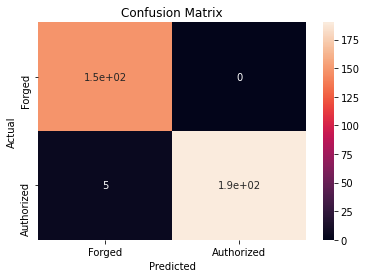

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["Forged", "Authorized"]

cm = confusion_matrix(actual_values, predicted_values, labels)

ax = plt.subplot()

sns.heatmap(cm , annot = True, ax = ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels)

In [20]:
tn, tp, fp, fn = confusion_matrix(y_test, p).ravel()
print(tn)
print(tp)
print(fp)
print(fn)

190
5
0
148


In [21]:
accuracy = 190+148/ 190+5+0+148
accuracy  = 338 / 343
print(accuracy * 100)

98.54227405247813
